In [26]:
cd /mnt/data

/mnt/data


In [27]:

! aws s3 ls s3://tick-genome/

                           PRE dna/
                           PRE multiqc/
                           PRE rna/


In [28]:

! aws s3 ls s3://tick-genome/rna/

                           PRE pacbio-isoseq/


In [29]:

! aws s3 ls s3://tick-genome/rna/pacbio-isoseq/

                           PRE 2018-06-07/


In [30]:

! aws s3 ls s3://tick-genome/rna/pacbio-isoseq/2018-06-07/

                           PRE fake_genome_and_transcriptome/
                           PRE output/
2018-07-31 22:19:02     361377 20180607_4ticks_Cogent_summary.xlsx
2018-07-31 22:19:02   12877175 20180607_tick_IsoSeq_Cogent_report.pptx


In [31]:
! aws s3 ls s3://tick-genome/rna/pacbio-isoseq/2018-06-07/output/

2018-07-31 22:19:02   26533060 tick0-Cogent.tar.gz
2018-09-07 23:33:08   19769307 tick0.hq.fastq.gz
2018-07-31 22:19:02   10453581 tick0.orphans.fasta
2018-07-31 22:19:02   21854852 tick1-Cogent.tar.gz
2018-09-07 23:33:08   21479958 tick1.hq.fastq.gz
2018-07-31 22:19:02   17223422 tick1.orphans.fasta
2018-07-31 22:19:03   19434779 tick2-Cogent.tar.gz
2018-09-07 23:33:08   21649679 tick2.hq.fastq.gz
2018-07-31 22:19:03   18703799 tick2.orphans.fasta
2018-07-31 22:19:03   11333175 tick4-Cogent.tar.gz
2018-07-31 22:19:03   11958199 tick4.orphans.fasta


In [121]:
! aws s3 sync s3://tick-genome/rna/pacbio-isoseq/2018-06-07/output/ /mnt/data/tick/isoseq/

download: s3://tick-genome/rna/pacbio-isoseq/2018-06-07/output/tick4.hq.fastq.gz to tick/isoseq/tick4.hq.fastq.gz
download: s3://tick-genome/rna/pacbio-isoseq/2018-06-07/output/tick2.lq.fastq.gz to tick/isoseq/tick2.lq.fastq.gz
download: s3://tick-genome/rna/pacbio-isoseq/2018-06-07/output/tick4.lq.fastq.gz to tick/isoseq/tick4.lq.fastq.gz
download: s3://tick-genome/rna/pacbio-isoseq/2018-06-07/output/tick1.lq.fastq.gz to tick/isoseq/tick1.lq.fastq.gz
download: s3://tick-genome/rna/pacbio-isoseq/2018-06-07/output/tick0.lq.fastq.gz to tick/isoseq/tick0.lq.fastq.gz


In [122]:
ls -lha /mnt/data/tick/isoseq/

total 664M
drwxrwxr-x 2 ubuntu ubuntu 4.0K Sep  8 00:29 ./
drwxrwxr-x 4 ubuntu ubuntu 4.0K Sep  7 23:36 ../
-rw-rw-r-- 1 ubuntu ubuntu  26M Jul 31 22:19 tick0-Cogent.tar.gz
-rw-rw-r-- 1 ubuntu ubuntu  19M Sep  7 23:33 tick0.hq.fastq.gz
-rw-rw-r-- 1 ubuntu ubuntu 123M Sep  7 23:33 tick0.lq.fastq.gz
-rw-rw-r-- 1 ubuntu ubuntu  10M Jul 31 22:19 tick0.orphans.fasta
-rw-rw-r-- 1 ubuntu ubuntu  21M Jul 31 22:19 tick1-Cogent.tar.gz
-rw-rw-r-- 1 ubuntu ubuntu  21M Sep  7 23:33 tick1.hq.fastq.gz
-rw-rw-r-- 1 ubuntu ubuntu 140M Sep  7 23:33 tick1.lq.fastq.gz
-rw-rw-r-- 1 ubuntu ubuntu  17M Jul 31 22:19 tick1.orphans.fasta
-rw-rw-r-- 1 ubuntu ubuntu  19M Jul 31 22:19 tick2-Cogent.tar.gz
-rw-rw-r-- 1 ubuntu ubuntu  21M Sep  7 23:33 tick2.hq.fastq.gz
-rw-rw-r-- 1 ubuntu ubuntu 122M Sep  7 23:34 tick2.lq.fastq.gz
-rw-rw-r-- 1 ubuntu ubuntu  18M Jul 31 22:19 tick2.orphans.fasta
-rw-rw-r-- 1 ubuntu ubuntu  11M Jul 31 22:19 tick4-Cogent.tar.gz
-rw-rw-r-- 1 ubuntu ubuntu  14M Sep  7 23:34 tick4.hq.fastq

In [43]:
! aws s3 sync s3://tick-genome/rna/pacbio-isoseq/2018-06-07/fake_genome_and_transcriptome/ /mnt/data/tick/fake-genome-transcriptome/

In [44]:
ls  /mnt/data/tick/fake-genome-transcriptome/

tick0.fake.genome.fasta             tick2.fake.genome.fasta
tick0.fake_ref_transcriptome.fasta  tick2.fake_ref_transcriptome.fasta
tick1.fake.genome.fasta             tick4.fake.genome.fasta
tick1.fake_ref_transcriptome.fasta  tick4.fake_ref_transcriptome.fasta


In [34]:
! sourmash compute -h

usage: sourmash [-h] [--protein] [--no-protein] [--dna] [--no-dna] [-q]
                [--input-is-protein] [-k KSIZES] [-n NUM_HASHES]
                [--check-sequence] [-f] [-o OUTPUT] [--singleton]
                [--merge MERGED] [--name-from-first] [--track-abundance]
                [--scaled SCALED] [--seed SEED] [--randomize]
                [--license LICENSE]
                filenames [filenames ...]

positional arguments:
  filenames             file(s) of sequences

optional arguments:
  -h, --help            show this help message and exit
  --protein             build protein signatures (default: False)
  --no-protein          do not build protein signatures
  --dna                 build DNA signatures (default: True)
  --no-dna              do not build DNA signatures
  -q, --quiet           suppress non-error output
  --input-is-protein    Consume protein sequences - no translation needed.
  -k KSIZES, --ksizes KSIZES
                        comma-separated list of k-

In [39]:
! sourmash compute --ksizes '21,27,33,51' --protein --dna /mnt/data/tick/isoseq/*.orphans.fasta

computing signatures for files: /mnt/data/tick/isoseq/tick0.orphans.fasta, /mnt/data/tick/isoseq/tick1.orphans.fasta, /mnt/data/tick/isoseq/tick2.orphans.fasta, /mnt/data/tick/isoseq/tick4.orphans.fasta
Computing signature for ksizes: [21, 27, 33, 51]
Computing both DNA and protein signatures.
Computing a total of 8 signature(s).
... reading sequences from /mnt/data/tick/isoseq/tick0.orphans.fasta
calculated 8 signatures for 7707 sequences in /mnt/data/tick/isoseq/tick0.orphans.fasta
saved 8 signature(s). Note: signature license is CC0.
... reading sequences from /mnt/data/tick/isoseq/tick1.orphans.fasta
calculated 8 signatures for 8065 sequences in /mnt/data/tick/isoseq/tick1.orphans.fasta
saved 8 signature(s). Note: signature license is CC0.
... reading sequences from /mnt/data/tick/isoseq/tick2.orphans.fasta
calculated 8 signatures for 10004 sequences in /mnt/data/tick/isoseq/tick2.orphans.fasta
saved 8 signature(s). Note: signature license is CC0.
... reading sequences from /mnt/da

In [46]:
ls

10X_P7_8/                        tick/
lost+found/                      tick0.orphans.fasta.sig
lung_cancer_sourmash_v3/         tick1.orphans.fasta.sig
maca-facs-sourmash_compute_all/  tick2.orphans.fasta.sig
sourmash_databases/              tick4.orphans.fasta.sig


In [47]:
! sourmash compute --ksizes '21,27,33,51' --protein --dna /mnt/data/tick/fake-genome-transcriptome/*.fasta

computing signatures for files: /mnt/data/tick/fake-genome-transcriptome/tick0.fake.genome.fasta, /mnt/data/tick/fake-genome-transcriptome/tick0.fake_ref_transcriptome.fasta, /mnt/data/tick/fake-genome-transcriptome/tick1.fake.genome.fasta, /mnt/data/tick/fake-genome-transcriptome/tick1.fake_ref_transcriptome.fasta, /mnt/data/tick/fake-genome-transcriptome/tick2.fake.genome.fasta, /mnt/data/tick/fake-genome-transcriptome/tick2.fake_ref_transcriptome.fasta, /mnt/data/tick/fake-genome-transcriptome/tick4.fake.genome.fasta, /mnt/data/tick/fake-genome-transcriptome/tick4.fake_ref_transcriptome.fasta
Computing signature for ksizes: [21, 27, 33, 51]
Computing both DNA and protein signatures.
Computing a total of 8 signature(s).
... reading sequences from /mnt/data/tick/fake-genome-transcriptome/tick0.fake.genome.fasta
calculated 8 signatures for 12681 sequences in /mnt/data/tick/fake-genome-transcriptome/tick0.fake.genome.fasta
saved 8 signature(s). Note: signature license is CC0.
... readin

In [53]:
import itertools


ksizes = 21, 27, 33, 51
sequence = 'dna', 'protein'

for ksize, seq in itertools.product(ksizes, sequence):
    print(f'ksize: {ksize}, seq: {seq}')
    csv = f'tick-orphans-k{ksize}-{seq}.csv'
    print(csv)
    ! sourmash compare --ksize $ksize --$seq --csv $csv tick*orphans.fasta.sig

ksize: 21, seq: dna
tick-orphans-k21-dna.csv
loaded 4 signatures total.                                                     

0-/mnt/data/tick/...	[1.    0.002 0.    0.002]
1-/mnt/data/tick/...	[0.002 1.    0.056 0.004]
2-/mnt/data/tick/...	[0.    0.056 1.    0.   ]
3-/mnt/data/tick/...	[0.002 0.004 0.    1.   ]
min similarity in matrix: 0.000
ksize: 21, seq: protein
tick-orphans-k21-protein.csv
loaded 4 signatures total.                                                     

0-/mnt/data/tick/...	[1.    0.042 0.02  0.054]
1-/mnt/data/tick/...	[0.042 1.    0.09  0.03 ]
2-/mnt/data/tick/...	[0.02  0.09  1.    0.022]
3-/mnt/data/tick/...	[0.054 0.03  0.022 1.   ]
min similarity in matrix: 0.020
ksize: 27, seq: dna
tick-orphans-k27-dna.csv
loaded 4 signatures total.                                                     

0-/mnt/data/tick/...	[1. 0. 0. 0.]
1-/mnt/data/tick/...	[0.    1.    0.036 0.   ]
2-/mnt/data/tick/...	[0.    0.036 1.    0.   ]
3-/mnt/data/tick/...	[0. 0. 0. 1.]
min simila

In [55]:
import itertools


ksizes = 21, 27, 33, 51
sequence = 'dna', 'protein'

for ksize, seq in itertools.product(ksizes, sequence):
    print(f'ksize: {ksize}, seq: {seq}')
    csv = f'tick-fake_ref_transcriptome-k{ksize}-{seq}.csv'
    print(csv)
    ! sourmash compare --ksize $ksize --$seq --csv $csv tick*fake_ref_transcriptome.fasta.sig

ksize: 21, seq: dna
tick-fake_ref_transcriptome-k21-dna.csv
loaded 4 signatures total.                                                     

0-/mnt/data/tick/...	[1.    0.002 0.    0.01 ]
1-/mnt/data/tick/...	[0.002 1.    0.096 0.002]
2-/mnt/data/tick/...	[0.    0.096 1.    0.   ]
3-/mnt/data/tick/...	[0.01  0.002 0.    1.   ]
min similarity in matrix: 0.000
ksize: 21, seq: protein
tick-fake_ref_transcriptome-k21-protein.csv
loaded 4 signatures total.                                                     

0-/mnt/data/tick/...	[1.    0.07  0.04  0.064]
1-/mnt/data/tick/...	[0.07  1.    0.136 0.05 ]
2-/mnt/data/tick/...	[0.04  0.136 1.    0.03 ]
3-/mnt/data/tick/...	[0.064 0.05  0.03  1.   ]
min similarity in matrix: 0.030
ksize: 27, seq: dna
tick-fake_ref_transcriptome-k27-dna.csv
loaded 4 signatures total.                                                     

0-/mnt/data/tick/...	[1.    0.    0.002 0.004]
1-/mnt/data/tick/...	[0.    1.    0.086 0.   ]
2-/mnt/data/tick/...	[0.002 0.086 1

In [56]:
import itertools


ksizes = 21, 27, 33, 51
sequence = 'dna', 'protein'

for ksize, seq in itertools.product(ksizes, sequence):
    print(f'ksize: {ksize}, seq: {seq}')
    csv = f'tick-fake_genome-k{ksize}-{seq}.csv'
    print(csv)
    ! sourmash compare --ksize $ksize --$seq --csv $csv tick*genome.fasta.sig

ksize: 21, seq: dna
tick-fake_genome-k21-dna.csv
loaded 4 signatures total.                                                     

0-/mnt/data/tick/...	[1.    0.002 0.    0.01 ]
1-/mnt/data/tick/...	[0.002 1.    0.09  0.002]
2-/mnt/data/tick/...	[0.   0.09 1.   0.  ]
3-/mnt/data/tick/...	[0.01  0.002 0.    1.   ]
min similarity in matrix: 0.000
ksize: 21, seq: protein
tick-fake_genome-k21-protein.csv
loaded 4 signatures total.                                                     

0-/mnt/data/tick/...	[1.    0.07  0.04  0.064]
1-/mnt/data/tick/...	[0.07  1.    0.132 0.046]
2-/mnt/data/tick/...	[0.04  0.132 1.    0.03 ]
3-/mnt/data/tick/...	[0.064 0.046 0.03  1.   ]
min similarity in matrix: 0.030
ksize: 27, seq: dna
tick-fake_genome-k27-dna.csv
loaded 4 signatures total.                                                     

0-/mnt/data/tick/...	[1.    0.    0.002 0.004]
1-/mnt/data/tick/...	[0.    1.    0.092 0.   ]
2-/mnt/data/tick/...	[0.002 0.092 1.    0.   ]
3-/mnt/data/tick/...	[0.0

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

In [93]:
import matplotlib.cm as cm

In [94]:
sns.matrix??

In [98]:
sns.cm??

In [ ]:
cm.r

tick-fake_genome-k21-dna.csv
tick-fake_genome-k21-protein.csv
tick-fake_genome-k27-dna.csv
tick-fake_genome-k27-protein.csv
tick-fake_genome-k33-dna.csv
tick-fake_genome-k33-protein.csv
tick-fake_genome-k51-dna.csv
tick-fake_genome-k51-protein.csv
tick-fake_ref_transcriptome-k21-dna.csv
tick-fake_ref_transcriptome-k21-protein.csv
tick-fake_ref_transcriptome-k27-dna.csv
tick-fake_ref_transcriptome-k27-protein.csv
tick-fake_ref_transcriptome-k33-dna.csv
tick-fake_ref_transcriptome-k33-protein.csv
tick-fake_ref_transcriptome-k51-dna.csv
tick-fake_ref_transcriptome-k51-protein.csv
tick-orphans-k21-dna.csv
tick-orphans-k21-protein.csv
tick-orphans-k27-dna.csv
tick-orphans-k27-protein.csv
tick-orphans-k33-dna.csv


/home/ubuntu/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


tick-orphans-k33-protein.csv
tick-orphans-k51-dna.csv
tick-orphans-k51-protein.csv


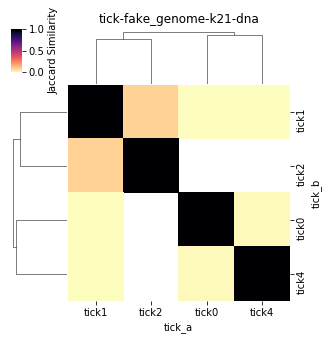

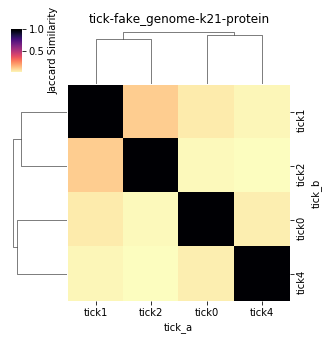

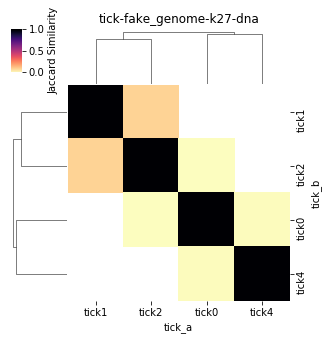

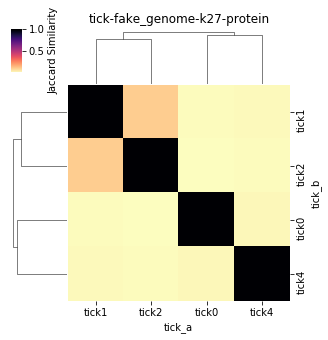

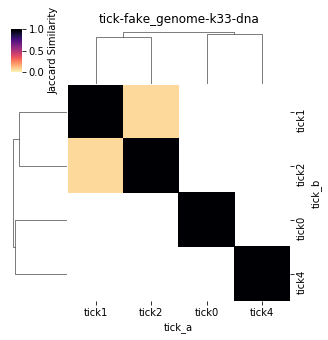

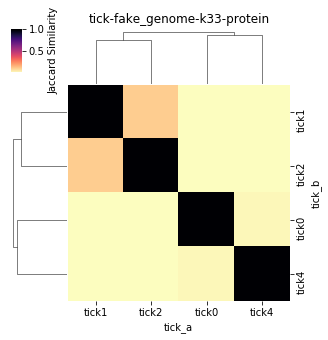

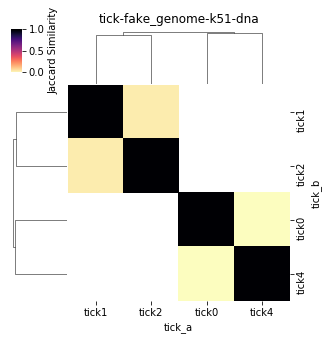

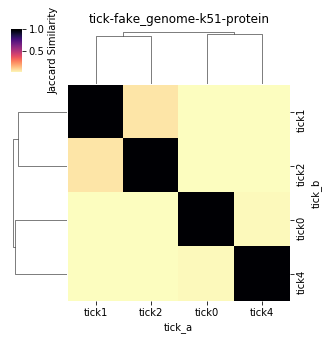

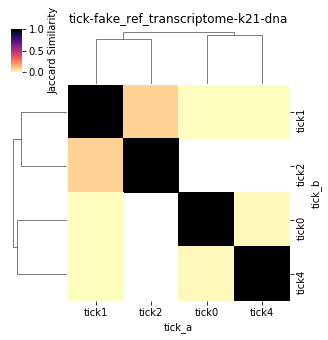

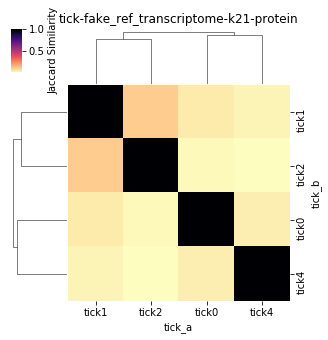

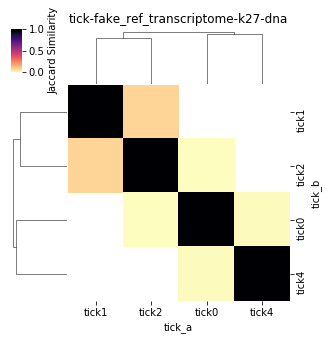

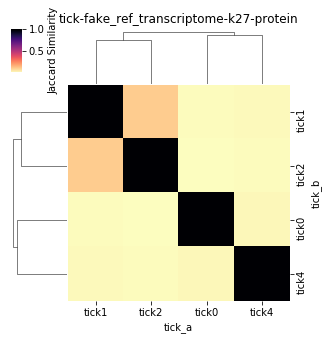

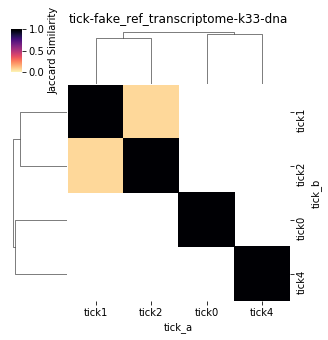

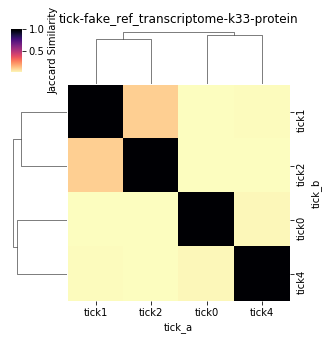

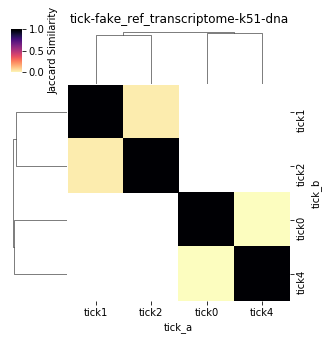

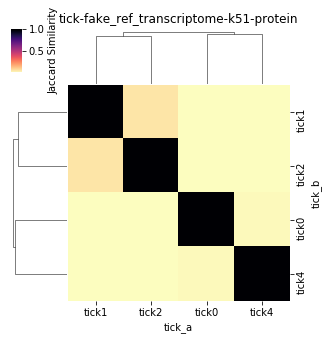

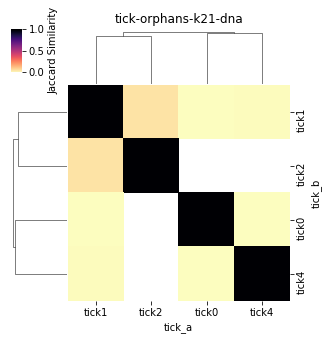

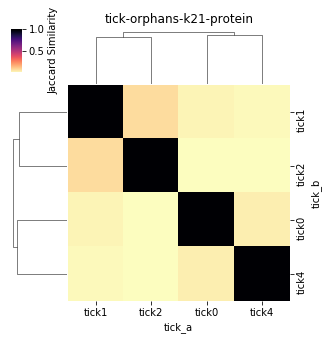

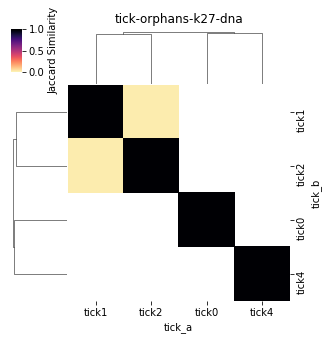

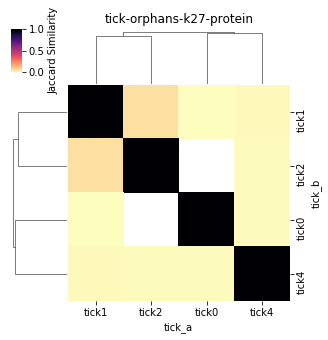

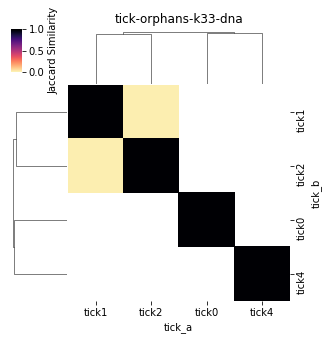

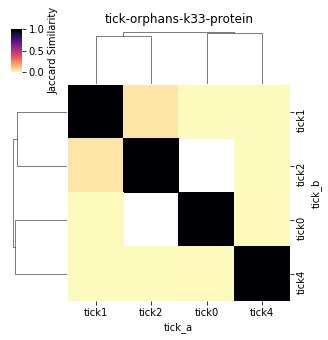

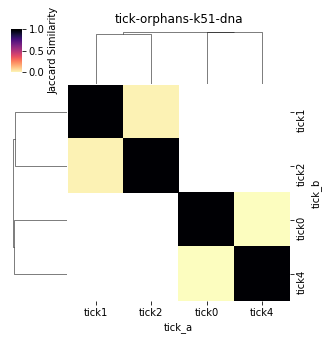

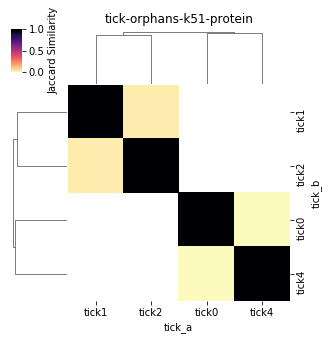

In [119]:
import os

csvs = ! ls *.csv

dfs = []
figure_folder = '/home/ubuntu/tick-genome/figures/rna_isoseq/'
!mkdir -p $figure_folder

for csv in csvs:
    basename = os.path.basename(csv)
    print(basename)
    
    prefix = basename.split('.csv')[0]
    species, sequence, ksize, seq = prefix.split('-')
    
    data2d = pd.read_csv(csv)
    columns = data2d.columns.map(lambda x: os.path.basename(x).split('.')[0])
#     columns = pd.Index(columns, name='tick_id')
    
    data2d.columns = pd.Index(columns, name='tick_a')
    data2d.index = pd.Index(columns, name='tick_b')
    
    g = sns.clustermap(data2d, mask=data2d==0, cmap='magma_r', figsize=(5, 5), method='ward', 
                   cbar_kws=dict(label='Jaccard Similarity', ticks=[0, 0.5, 1]))
    g.ax_col_dendrogram.set_title(prefix)
    pdf = figure_folder + basename.replace('.csv', '.pdf')
    g.savefig(pdf)
        
    df = data2d.unstack().reset_index()
    df = df.rename(columns={0:'similarity' })
    dfs.append(df)

Text(0.5,1,'asdf')

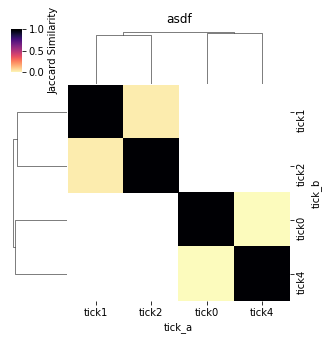

In [117]:
g = sns.clustermap(data2d, mask=data2d==0, cmap='magma_r', figsize=(5, 5), method='ward', 
                   cbar_kws=dict(label='Jaccard Similarity', ticks=[0, 0.5, 1]))
g.ax_col_dendrogram.set_title('asdf')
# g.cax.set_('Jaccard Similarity')

Text(0.5,1,'asdf')

In [85]:
g.

In [ ]:
# data2d = pd.read_csv(csv)


In [75]:
data2d = pd.read_csv('tick-orphans-k21-dna.csv')
data2d.head()

columns = data2d.columns.map(lambda x: os.path.basename(x).split('.')[0])
data2d.columns = pd.Index(columns, name='tick_a')
data2d.index = pd.Index(columns, name='tick_b')
data2d

tick_a,tick0,tick1,tick2,tick4
tick_b,,,,
tick0,1.000,0.002,0.000,0.002
tick1,0.002,1.000,0.056,0.004
tick2,0.000,0.056,1.000,0.000
tick4,0.002,0.004,0.000,1.000


In [76]:
data2d.unstack().reset_index()

,tick_a,tick_b,0
0,tick0,tick0,1.000
1,tick0,tick1,0.002
2,tick0,tick2,0.000
3,tick0,tick4,0.002
4,tick1,tick0,0.002
5,tick1,tick1,1.000
6,tick1,tick2,0.056
7,tick1,tick4,0.004
8,tick2,tick0,0.000
9,tick2,tick1,0.056


## Now compute on the input fastq files and track abundance

In [ ]:
! sourmash compute --ksizes '21,27,33,51' --protein --dna --track-abundance /mnt/data/tick/isoseq/*.hq.fastq.gz

computing signatures for files: /mnt/data/tick/isoseq/tick0.hq.fastq.gz, /mnt/data/tick/isoseq/tick1.hq.fastq.gz, /mnt/data/tick/isoseq/tick2.hq.fastq.gz, /mnt/data/tick/isoseq/tick4.hq.fastq.gz
Computing signature for ksizes: [21, 27, 33, 51]
Computing both DNA and protein signatures.
Computing a total of 8 signature(s).
Tracking abundance of input k-mers.
... reading sequences from /mnt/data/tick/isoseq/tick0.hq.fastq.gz
